# Classification Comparison on Iris Dataset

This notebook compares various classification algorithms using the Iris dataset. We will train and evaluate the following models:

1. Logistic Regression
2. K-Nearest Neighbors (KNN)
3. Support Vector Machine (SVM)
4. Decision Tree Classifier
5. Random Forest Classifier
6. Naive Bayes (GaussianNB)

We will evaluate them based on Accuracy, Precision, Recall, and F1-Score, and visualize their performance.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Model Selection & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dataset
from sklearn.datasets import load_iris

# Set plot style
sns.set(style="whitegrid")
%matplotlib inline

## 2. Load Data

In [2]:
# Load iris dataset as a DataFrame for easier handling
iris_data = load_iris(as_frame=True)
df = iris_data.frame

# Display first 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
# Check target class distribution
print("Target Class Distribution:")
print(df['target'].value_counts())
print(f"\nClass Names: {iris_data.target_names}")

Target Class Distribution:
target
0    50
1    50
2    50
Name: count, dtype: int64

Class Names: ['setosa' 'versicolor' 'virginica']


## 3. Exploratory Data Analysis (EDA)

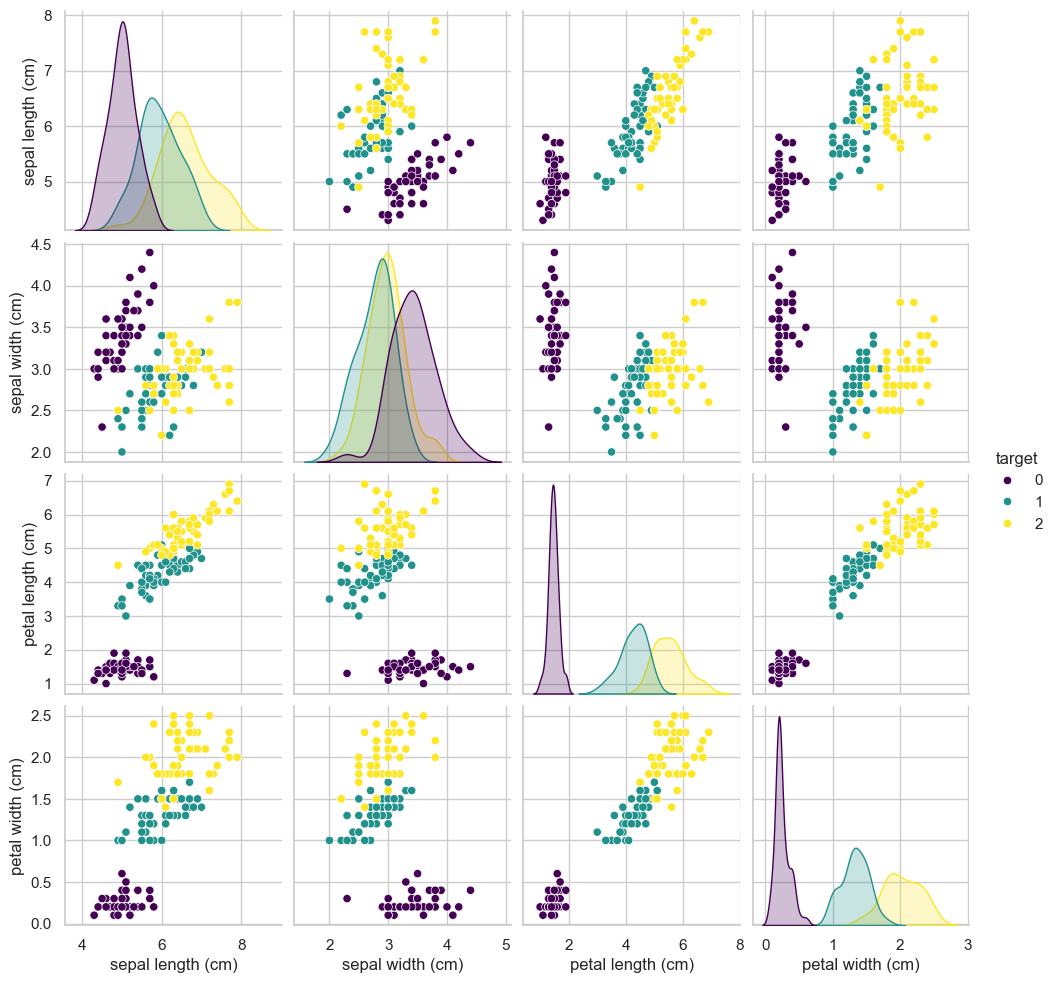

In [5]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='target', palette='viridis')
plt.show()

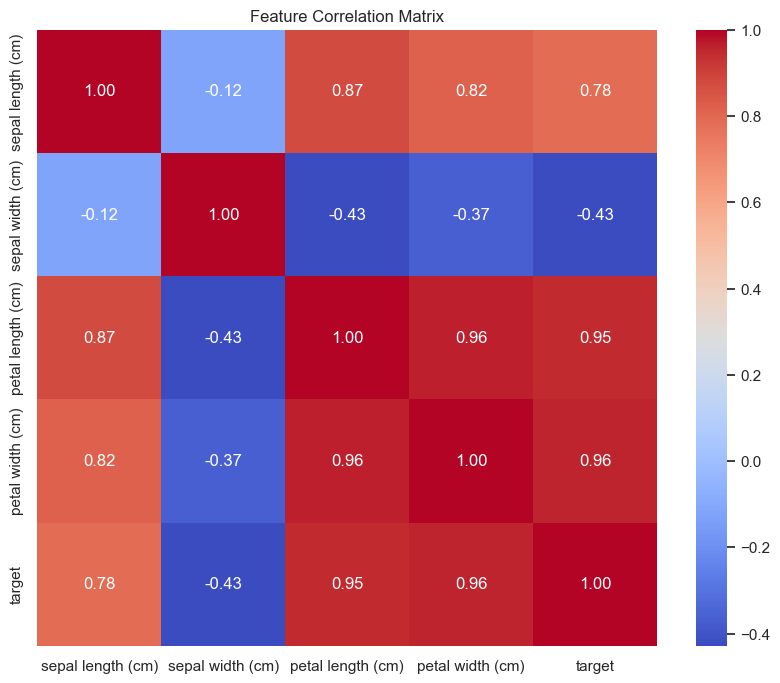

In [6]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

## 4. specific Data Splitting

In [7]:
X = iris_data.data
y = iris_data.target

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=40)

## 5. Model Implementation & Training

In [8]:
# Dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store results
results = {}

# Train and Predict
for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris_data.target_names))
    print("-"*50)

--- Logistic Regression ---
Accuracy: 0.9853

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       0.95      1.00      0.98        21
   virginica       1.00      0.96      0.98        23

    accuracy                           0.99        68
   macro avg       0.98      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68

--------------------------------------------------
--- KNN ---
Accuracy: 0.9265

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       0.81      1.00      0.89        21
   virginica       1.00      0.78      0.88        23

    accuracy                           0.93        68
   macro avg       0.94      0.93      0.92        68
weighted avg       0.94      0.93      0.93        68

--------------------------------------------------
--- SVM ---


## 6. Model Comparison

In [9]:
# Create DataFrame for results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

results_df

,Model,Accuracy
2,SVM,1.000000
0,Logistic Regression,0.985294
5,Naive Bayes,0.985294
4,Random Forest,0.955882
1,KNN,0.926471
3,Decision Tree,0.926471


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_7756\2762307951.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


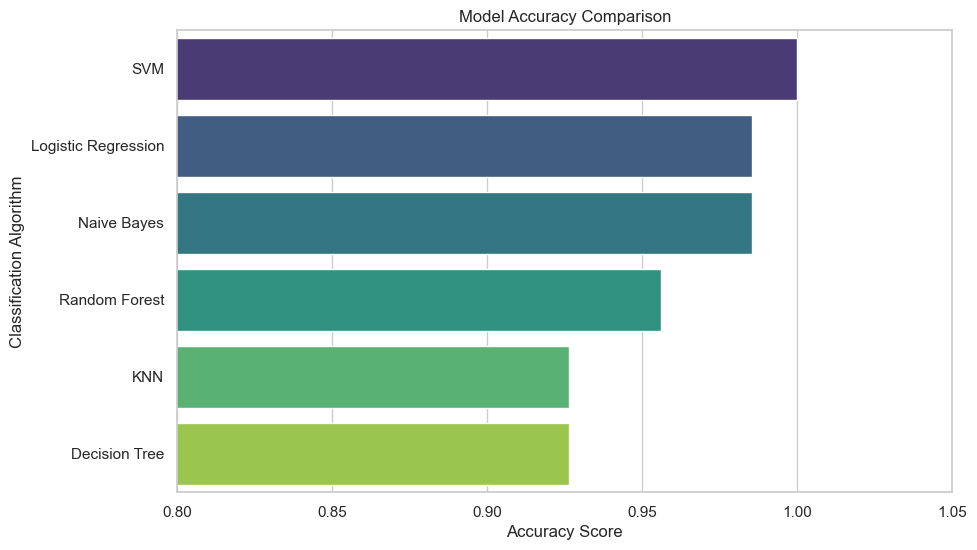

In [10]:
# Plot model accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.xlim(0.8, 1.05)
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy Score")
plt.ylabel("Classification Algorithm")
plt.show()

## 7. Confusion Matrices

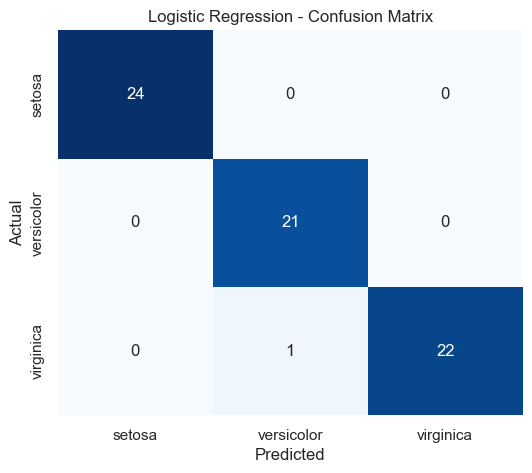

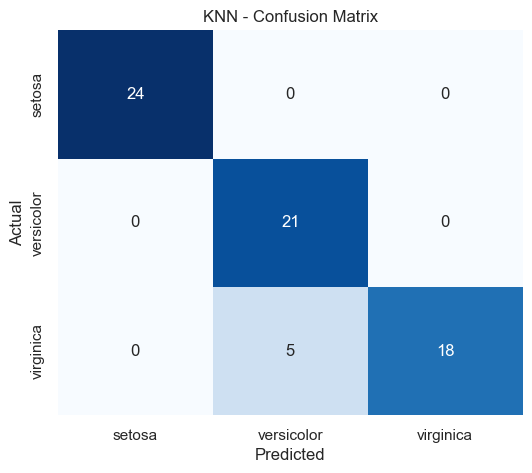

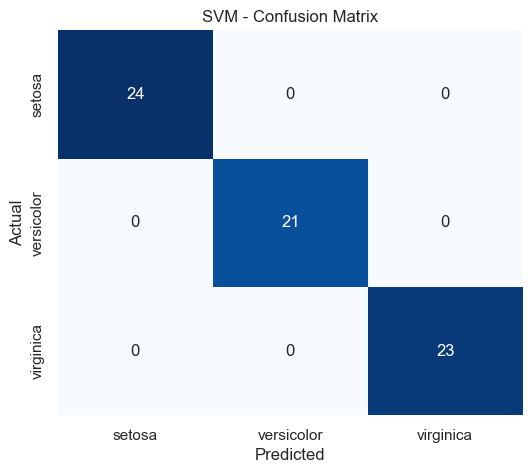

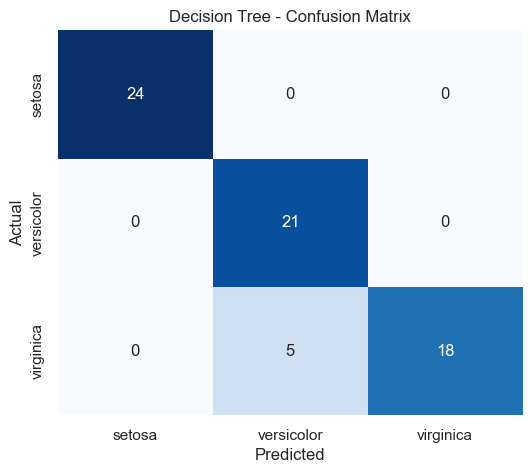

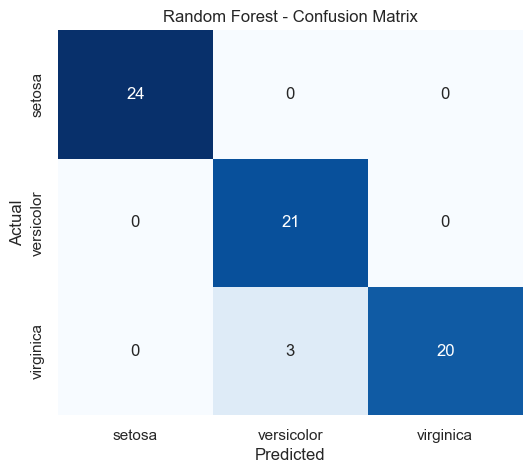

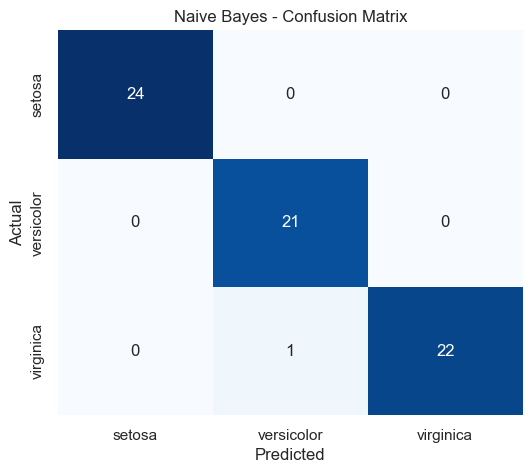

In [11]:
# Plot separate confusion matrices
for name, model in models.items():
    plt.figure(figsize=(6, 5))
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=iris_data.target_names, 
                yticklabels=iris_data.target_names)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## 8. Decision Boundaries Visualization
To better understand how each model classifies the data, we will plot decision boundaries. 
Since decision boundaries are best visualized in 2D, we will retrain our models using only the first two features: **Sepal Length** and **Sepal Width**.

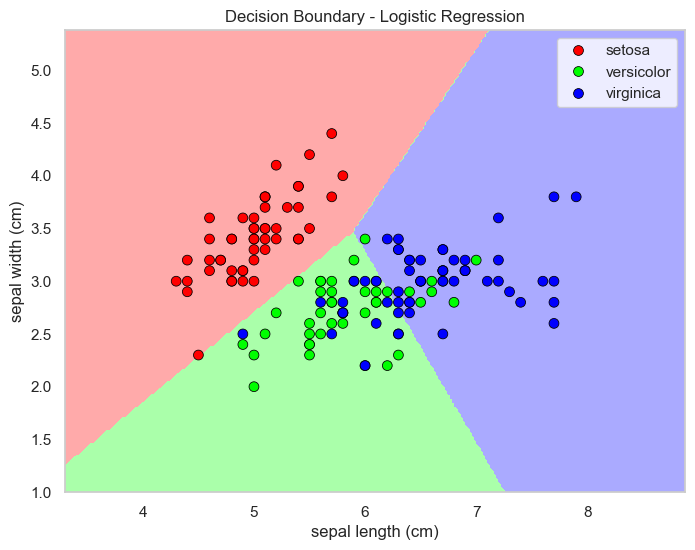

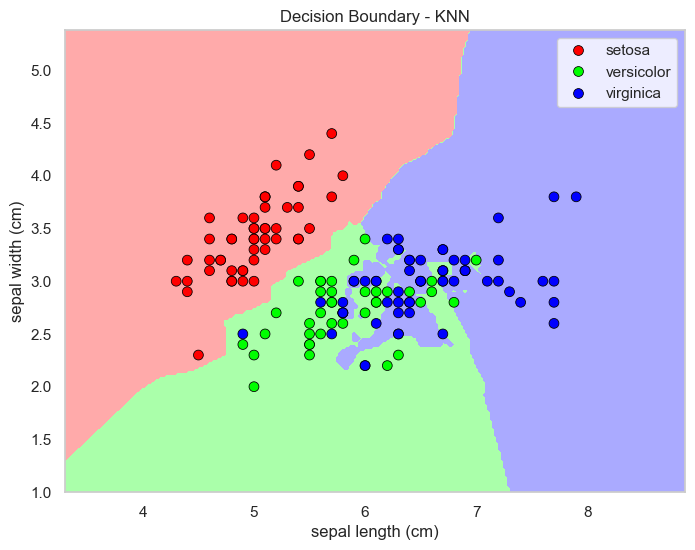

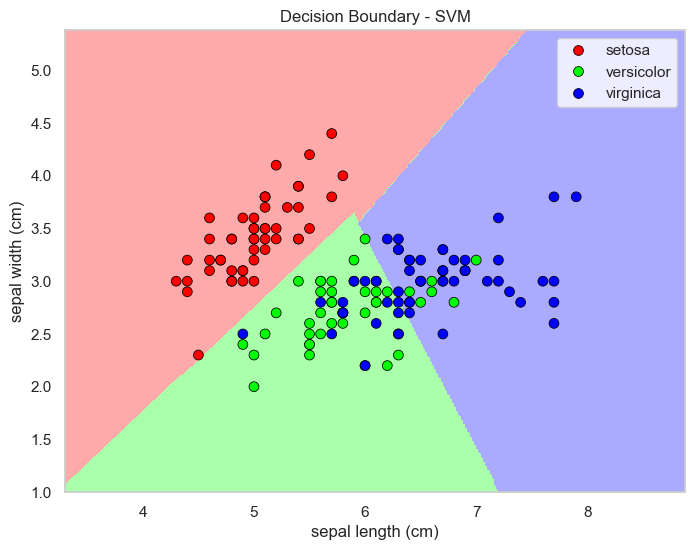

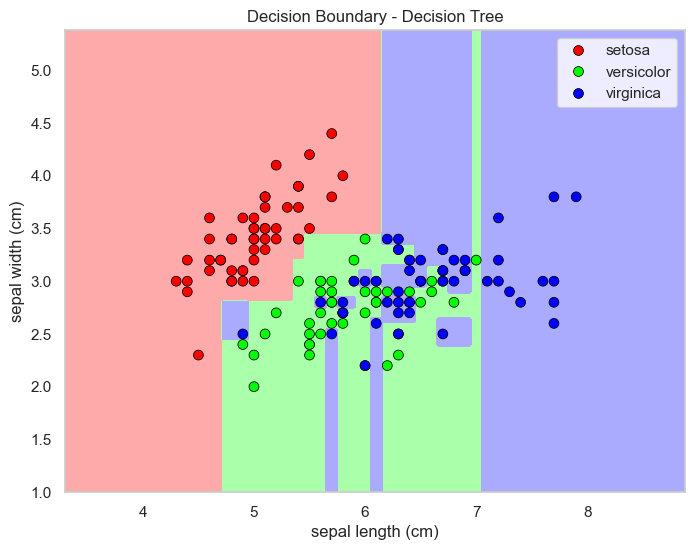

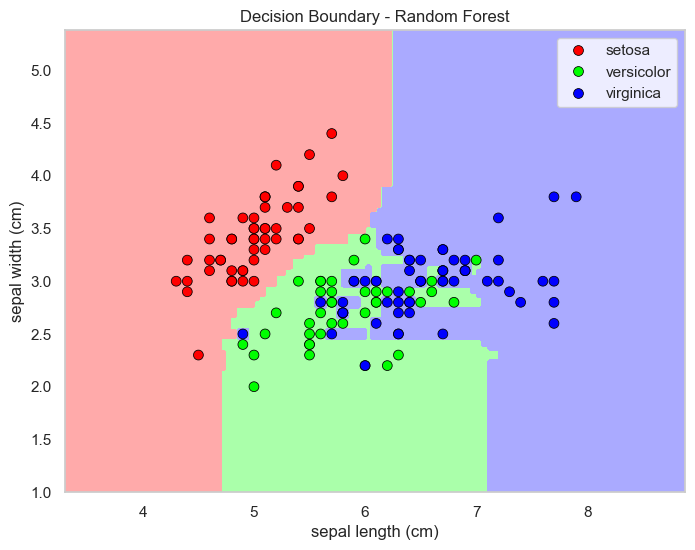

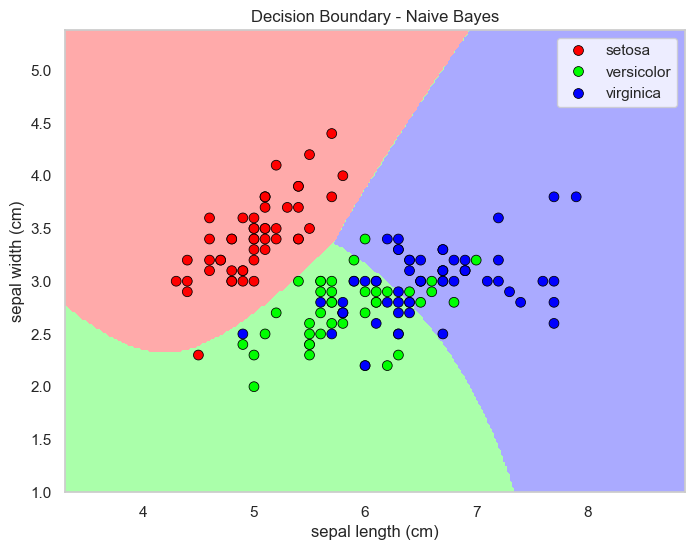

In [12]:
from matplotlib.colors import ListedColormap

# Use only the first two features for 2D visualization
X_2d = iris_data.data.iloc[:, :2].values  # Sepal Length, Sepal Width
y_2d = iris_data.target.values

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_decision_boundary(model, X, y, title):
    # Train the model on 2D data
    model.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    
    # Plot training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris_data.target_names[y], 
                    palette=['#FF0000', '#00FF00', '#0000FF'], edgecolor="black", s=50)
    
    plt.title(title)
    plt.xlabel(iris_data.feature_names[0])
    plt.ylabel(iris_data.feature_names[1])
    plt.show()

# Plot decision boundaries for each model
for name, model in models.items():
    plot_decision_boundary(model, X_2d, y_2d, f"Decision Boundary - {name}")